In [1]:
# down sampling on detailTemp.csv

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Rest", "CCCV_Chg","CCCV_Dchg"]

In [3]:
data = pd.read_csv('C:/Users/Impana/Desktop/Documents/nunam/detailTemp.csv',sep=',')
data.head()

,Record ID,Step Name,Relative Time(h:min:s.ms),Realtime,Auxiliary channel TU1 T(°C),Gap of Temperature
0,1,Rest,0:00:00.000,10-10-2020 20:03:39,27.7,0.0
1,2,Rest,0:00:01.000,10-10-2020 20:03:40,27.7,0.0
2,3,Rest,0:00:02.000,10-10-2020 20:03:41,27.7,0.0
3,4,Rest,0:00:03.000,10-10-2020 20:03:42,27.7,0.0
4,5,Rest,0:00:04.000,10-10-2020 20:03:43,27.7,0.0


In [ ]:
# dependent variable -- status-- unique value -- rest and CCCv_chg and CCCV_Dhg

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416681 entries, 0 to 416680
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Record ID                    416681 non-null  int64  
 1   Step Name                    416681 non-null  object 
 2   Relative Time(h:min:s.ms)    416681 non-null  object 
 3   Realtime                     416681 non-null  object 
 4   Auxiliary channel TU1 T(°C)  416681 non-null  float64
 5   Gap of Temperature           416681 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.1+ MB


In [5]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Step Name"]]
# Store the variable we are predicting 
target = "Step Name"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(416681, 5)
(416681,)


In [7]:
# Exploratory analysis

In [8]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

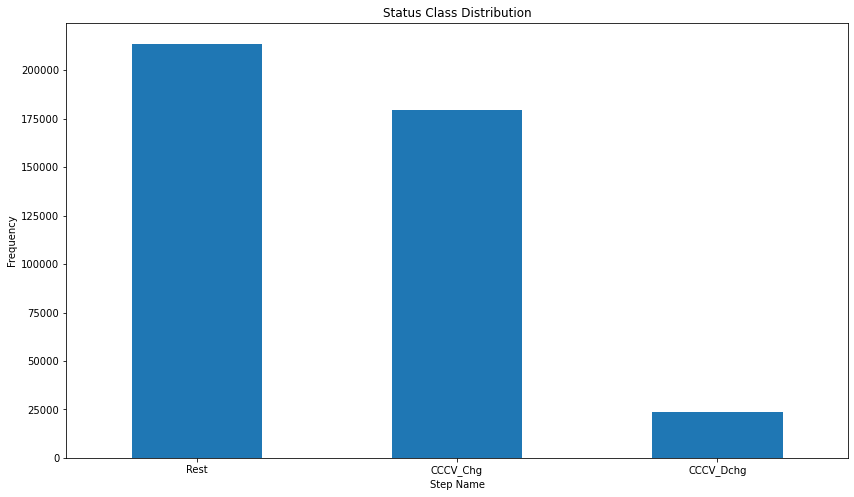

In [9]:
count_classes = pd.value_counts(data['Step Name'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Status Class Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Step Name")
plt.ylabel("Frequency")

In [11]:
## Get the rest, CCCV_chg and CCCV_DChg dataset 

Rest = data[data['Step Name']=="Rest"]

CCCV_Chg = data[data['Step Name']=="CCCV_Chg"]

CCCV_DChg = data[data['Step Name']=="CCCV_DChg"]

In [12]:
print(Rest.shape, CCCV_Chg.shape, CCCV_DChg.shape)
# 1st highest--CCCV_Chg,
# 2nd highest -- CCCV_CDhg,
# last -- Rest

(23449, 6) (213706, 6) (179526, 6)


In [13]:
from imblearn.under_sampling import NearMiss

In [15]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(randomState=33)
X_res,Y_res=nm.fit_sample(X,Y)

TypeError: __init__() got an unexpected keyword argument 'randomState'

In [16]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'CCCV_Chg': 213706, 'CCCV_DChg': 179526, 'Rest': 23449})


NameError: name 'y_res' is not defined

In [18]:
data.to_csv("detailDownSampledTemp.csv")#exporting the down sampled file.